In [ ]:
""" Diagnostic model means both monkey and model do same task, and compare summary statistics.
e.g., correlation between monkey and model in these staitics (across tasks)?
e.g., want to present stasitics of monkey, but also want to compare to controls (models).
(e..g, what if did task randomly).

# SUMMARY OF APPROACH
# - BehClass is the grounded (concrete) sequence. returns features of that sequence
# - ChunksClass is all possible chunking for a given task. Has methods for grounding the chunks.

"""


In [4]:
from pythonlib.dataset.dataset import Dataset
from pythonlib.dataset.dataset_preprocess.general import preprocessDat
import numpy as np
import matplotlib.pyplot as plt
from pythonlib.dataset.analy_dlist import concatDatasets
import pandas as pd
import seaborn as sns

In [2]:
SDIR = "/data2/analyses/notebook/analy_diagnostic_model_220208"
import os
os.makedirs(SDIR, exist_ok=True)

##### Extract and preprocess dataset

In [39]:
expt = "gridlinecircle"
animal = "Pancho"
list_rule = ["baseline", "linetocircle", "circletoline", "lolli"]
list_rule = ["baseline", "linetocircle", "circletoline"] # to make faster

D = Dataset([])
D.load_dataset_helper(animal, expt, ver="mult", rule=list_rule)
D = D.filterPandas({"monkey_train_or_test":"test"}, "dataset")
            
# Dlist = []
# for rule in list_rule:
#     D = Dataset([])
#     D.load_dataset_helper(animal, expt, rule=rule)
#     # D.load_dataset_helper(animal, expt, rule=list_rule, ver="mult")

#     # Extract pre-saved tasks
#     D.load_tasks_helper()

#     # Restrict to unsupervised trials
#     D = D.filterPandas({"monkey_train_or_test":["undefined"]}, "dataset")
    
#     Dlist.append(D)
    
# D = concatDatasets(Dlist)

# # preprocess

# # # assert False, "this removes the test task sthat were not done at baseline, but were done for the three grammars"
# # only_keep_trials_across_groupings = False
# # # Ideally include all tasks, but if want to compare to baseline, then only include those baseline tasks.
# # D, GROUPING, GROUPING_LEVELS, FEATURE_NAMES, SCORE_COL_NAMES = preprocessDat(D, expt, 
# #                                                      only_keep_trials_across_groupings=only_keep_trials_across_groupings)
    

Searching using this string:
/gorilla1/analyses/database/*Pancho-*gridlinecircle-*baseline-*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
0
Searching using this string:
/gorilla1/analyses/database/BEH/*Pancho-*gridlinecircle-*baseline-*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
2
---
/gorilla1/analyses/database/BEH/Pancho-gridlinecircle-baseline-210824_002447
---
/gorilla1/analyses/database/BEH/Pancho-gridlinecircle-baseline-221108_215821
Searching using this string:
/gorilla1/analyses/database/*Pancho-*gridlinecircle-*linetocircle-*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
0
Searching using this string:
/gorilla1/analyses/database/BEH/*Pancho-*gridlinecircle-*linetocircle-*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
2
---
/gorilla1/analyses/database/BEH/Pancho-gridlinecircle-linetocircle-210828_100152
---
/gorilla1/analyses/database/BEH/Pancho-gridlinecircle-linetocircle-221108_220330
Searching us

resetting index
Updated columns: insummarydates, using Metadats
Searching using this string:
/gorilla1/analyses/database/TASKS_GENERAL/Pancho-gridlinecircle-baseline-all/*Tasks*pkl
Found this many paths:
1
---
/gorilla1/analyses/database/TASKS_GENERAL/Pancho-gridlinecircle-baseline-all/Tasks.pkl
--- Loading tasks pkl file:  /gorilla1/analyses/database/TASKS_GENERAL/Pancho-gridlinecircle-baseline-all/Tasks.pkl
Searching using this string:
/gorilla1/analyses/database/TASKS_GENERAL/Pancho-gridlinecircle-linetocircle-all/*Tasks*pkl
Found this many paths:
1
---
/gorilla1/analyses/database/TASKS_GENERAL/Pancho-gridlinecircle-linetocircle-all/Tasks.pkl
--- Loading tasks pkl file:  /gorilla1/analyses/database/TASKS_GENERAL/Pancho-gridlinecircle-linetocircle-all/Tasks.pkl
Searching using this string:
/gorilla1/analyses/database/TASKS_GENERAL/Pancho-gridlinecircle-circletoline-all/*Tasks*pkl
Found this many paths:
1
---
/gorilla1/analyses/database/TASKS_GENERAL/Pancho-gridlinecircle-circletoline

##### For all beh trials, get alignment to task 

This will be used for computing summary statistic

In [80]:
# Extract all behclass
D.behclass_preprocess_wrapper()

stored in self.Dat[BehClass]
0
200
400


In [84]:
Beh = D.Dat.iloc[10]["BehClass"]
Beh.Alignsim_taskstrokeinds_foreachbeh_sorted

array([0, 1, 2, 3, 4])

### Replace all of below with a class GrammarDat()

In [ ]:
from pythonlib.grammar.GrammarDat import GrammarDat

ind = 100
input_data_dict = {
    "dataset":D,
    "ind_dataset":ind
}
GD = GrammarDat(input_data_dict, input_version = "dataset")

GD.grammar_parses_generate("lolli")

### Compute and collect summary statistics for beh and model

##### For a given model (e..g, defined by ChunksList), simulate possible sequences

In [ ]:
LIST_MOTIFS = [
    ("repeat", {"shapekey":"shape",
                 "shape":"circle",
                 "nmin":2,
                 "nmax":4}),
    ("repeat", {"shapekey":"shape",
                 "shape":"line",
                 "nmin":2,
                 "nmax":4}),
    ("lolli", {})
]

motifname, motifparams = LIST_MOTIFS[2]
rule_control_model = "alternate"
indtrial = 0
max_perms = 1
return_as_number_instances = False
list_matches = alignsim_find_motif_in_beh_wildcard_control(motifname, motifparams, 
                                                rule_control_model, indtrial,
                                                list_beh_mask = None, max_perms=max_perms,
                                                return_as_number_instances=return_as_number_instances)

In [91]:
def alignsim_find_motif_in_beh_wildcard_control(motifname, motifparams, 
                                                rule_control_model, indtrial,
                                                list_beh_mask = None, max_perms=100,
                                                return_as_number_instances=False):
    """
    RETURNS:
    - list_matches
    (None, None) if this rule_control_model doesnt have any parses for this trial's task
    """
    ## Extract all chunks for a given rule, for this task
    from pythonlib.chunks.chunksclass import ChunksClassList
    from pythonlib.behavior.behaviorclass import BehaviorClass

#     indtrial = 125
    motifkind = motifname
    motif_params = motifparams

    # Extract all chunks consistent with this rule for this task
    Task = D.Dat.iloc[indtrial]["Task"]
    params = {
        "Task":Task,
        "expt":expt, 
        "rule":rule_control_model
    }
    CL = ChunksClassList(method="task_entry", params=params)
    CL.remove_chunks_that_concat_strokes() # Only keep the chunks that are defined by hierarhcy, not by concatting strokes
    
    CL.print_summary()
    assert False
    
    if len(CL.ListChunksClass)==0:
        # Then no chunks exist
        return None, None
    
    # For each chunk, convert to a concrete datseg sequence
    # - do this by making "fake" Beh instances, one for each permutation.
    params = {
        "D":D,
        "ind":indtrial,
        "expt":expt
    }

    def _flatten_chunks(chunks):
        return [xx for x in chunks for xx in x]

    # Print and plot results for all chunk permutations
    # - collect all matches, and combine into summary
    list_matches = []
    for C in CL.ListChunksClass:
        # Get all permutations of grounded concrete sequences, given a chunks
        list_chunk_permutations = C.search_permutations_chunks(max_perms=max_perms)
#         print(list_chunk_permutations)
#         C.print_summary()
        for chunks in list_chunk_permutations:
            BehFake = BehaviorClass(params, "dataset")
            BehFake.Alignsim_taskstrokeinds_sorted = _flatten_chunks(chunks)
            BehFake.Alignsim_taskstrokeinds_foreachbeh_sorted = []
            BehFake.Alignsim_Datsegs = None
        
            matches = BehFake.alignsim_find_motif_in_beh_wildcard(motifkind, motif_params, 
                                                                  return_as_number_instances=return_as_number_instances)
            
            list_matches.append(matches)
            if False:
                display(matches)
                BehFake.alignsim_plot_summary()
    return list_matches

In [92]:
# Sample  a single ordering of tokens that does alternation
# 
import random

def _eligible_tokens(tokens_remain, tokens_taken):
    """ 
    all are lists of indices
    """
    # only those not taken and not identical shape to prev taken
    if len(tokens_taken)==0:
        tokens_elegible = tokens_remain
    else:
        tokens_elegible = [t for t in tokens_remain if list_tokens[t] != list_tokens[tokens_taken[-1]]]
        if len(tokens_elegible)==0 and len(tokens_remain)>0:
            # then open up eligibility to all tokens
            tokens_elegible = tokens_remain
    return tokens_elegible

def _sample_token(tokens_remain, tokens_taken):
    tokens_elig = _eligible_tokens(tokens_remain, tokens_taken)
    ind_tok = random.choice(tokens_elig)
    
    tokens_taken.append(ind_tok)
    tokens_remain = [t for t in tokens_remain if t!=ind_tok]
    return tokens_remain, tokens_taken
    
def _sample_single_chunk(list_tokens):
    tokens_remain = range(len(list_tokens))
    tokens_taken = []
    while len(tokens_remain)>0:
        tokens_remain, tokens_taken = _sample_token(tokens_remain, tokens_taken)
    return tokens_taken

list_tokens = ["line", "circle", "line", "circle"]
_sample_single_chunk(list_tokens)


[0, 3, 2, 1]

In [101]:
def _count_num_tokens_used(dict_matches, unique_tokens=True):
    """ Counts number of tokens used across motifs within
    dict_matches. 
    PARAMS:
    - dict_matches, dict where keys are motifs and values 
    are lists of lists of ints (found storke groupings_)
    - unique_tokens, bool, if True, then only counts unique
    tokens used
    RETURNS:
    - scalar, num tokens
    """
    
    for k, v in dict_matches.items():
        for vv in v:
            assert isinstance(vv, list), "you probably gave me already counted data"
    
    list_tok_all = []
    for v in dict_matches.values(): # get each list of list
        for vv in v: # list of int
            list_tok_all.extend(vv)
    if unique_tokens:
        list_tok_all = list(set(list_tok_all))
    return len(list_tok_all)
    
    
def _ntok_per_group(motifkind, key):
    if motifkind=="repeat":
        return key
    elif motifkind=="lolli":
        return 2
    else:
        assert False

        
def _score_name(motifkind, motif_params):
    if motifkind=="lolli":
        return f"ntokens-lolli"
    elif motifkind=="repeat":
        return f"ntokens-repeat_{motif_params['shape']}"
    else:
        assert False

        
        
GET_MODELS = True

# This determines what kinds of scores are collected
LIST_MOTIFS = [
    ("repeat", {"shapekey":"shape",
                 "shape":"circle",
                 "nmin":2,
                 "nmax":4}),
    ("repeat", {"shapekey":"shape",
                 "shape":"line",
                 "nmin":2,
                 "nmax":4}),
    ("lolli", {})
]

# This determines which models (controls) to get
LIST_MODELS = ["alternate", "baseline", "linetocircle", "circletoline", "lolli"]

    

DAT = []

# For behvior, collect across all trials
for indtrial in range(len(D.Dat)):
    if indtrial%50==0:
        print(indtrial)
        
    character = D.Dat.iloc[indtrial]["character"]
    epoch = D.Dat.iloc[indtrial]["epoch"]
    monkey_train_or_test = D.Dat.iloc[indtrial]["monkey_train_or_test"]


    for motifkind, motif_params in LIST_MOTIFS:
        
        # 2) Collect behavior
        Beh = D.Dat.iloc[indtrial]["BehClass"]
        matches_summary_frac_beh = Beh.alignsim_find_motif_in_beh_wildcard(motifkind, 
                                                                           motif_params,
                                                                           return_as_number_instances=False)
        ntok_expected_pertrial = _count_num_tokens_used(matches_summary_frac_beh)
#         ntok_expected_pertrial = sum([_ntok_per_group(motifkind, k)*v for k, v in matches_summary_frac_beh.items()])
        DAT.append({
            "indtrial":indtrial,
            "agent":f"{animal}-{epoch}",
            "score_name": _score_name(motifkind, motif_params),
            "score_value": ntok_expected_pertrial,
            "character": character,
            "epoch": epoch,
            "monkey_train_or_test": monkey_train_or_test})

        

# For model, collect across all unique tasks
# For behvior, collect across all trials

list_characters = D.Dat["character"].unique().tolist()
def _get_single_trial(char):
    """ Get the first trial that uses this char
    """
    return D.Dat[D.Dat["character"]==char].index.tolist()[0]

if GET_MODELS:
    for i, character in enumerate(list_characters):
        if i%10==0:
            print("character", i, "/", len(list_characters), character)

        indtrial = _get_single_trial(character)
        epoch = D.Dat.iloc[indtrial]["epoch"]
        monkey_train_or_test = D.Dat.iloc[indtrial]["monkey_train_or_test"]
        
        for motifkind, motif_params in LIST_MOTIFS:

            if GET_MODELS:
                # 1) Collect all models    
                for rule_control_model in LIST_MODELS:
                    # collect expected number of tokens in each motif
                    list_matches = alignsim_find_motif_in_beh_wildcard_control(
                        motifkind, motif_params, rule_control_model, indtrial,
                        return_as_number_instances=False)
                    
                    # For each match, compute the num tokens used
                    if list_matches is None:
                        ntok_expected_pertrial = 0
                    else:
                        list_ntok_used = [_count_num_tokens_used(dict_match) for dict_match in list_matches]
                        ntok_expected_pertrial = np.mean(list_ntok_used)
                    
                    DAT.append({
                        "indtrial":indtrial,
                        "agent":f"model-{rule_control_model}",
                        "score_name": _score_name(motifkind, motif_params),
                        "score_value": ntok_expected_pertrial,
                        "character": character,
                        "epoch": epoch,
                        "monkey_train_or_test": monkey_train_or_test})

0
50
100
150
200
250
300
350
400
450
500
550
character 0 / 40 mixture2-ss-3-1-995290
character 10 / 40 mixture2-ss-5-1-614601
character 20 / 40 mixture2-ss-3-1-510665
character 30 / 40 mixture2-ss-2-1-795134


In [ ]:
dfall["agent"].value_counts()

##### Do some post preocessing and convert to dataframe

In [74]:
from pythonlib.tools.pandastools import aggregGeneral, applyFunctionToAllRows

dfall = pd.DataFrame(DAT)

# add a column indicating if is monkey or model
def F(x):
    if animal in x["agent"]:
        return "monkey"
    elif "model" in x["agent"]:
        return "model"
    else:
        print(x)
        assert False
dfall = applyFunctionToAllRows(dfall, F, "agent_kind")


# add a column indicating the rule (either for monkey or model)
def F(x):
    ind = x["agent"].find("-")
    return x["agent"][ind+1:]

dfall = applyFunctionToAllRows(dfall, F, "agent_rule")

# Merge linetocircle and circletoline? If only care about repeats then do this
# - add a new column

def F(x):
    if x["agent_rule"] in ["linetocircle", "circletoline"]:
        return "repeats"
    else:
        return x["agent_rule"]

dfall = applyFunctionToAllRows(dfall, F, "agent_rule")

# Aggregate, taking mean over trials
dfall_agg = aggregGeneral(dfall, group=["score_name", "character", "agent_kind", "agent_rule"], 
              values=["score_value"], nonnumercols=[])

print(len(dfall))
print(len(dfall_agg))
print(len(list_characters))

{'score_value': ['mean']}
2724
798
40


##### For loading and saving - didnt really use this

In [157]:
if False:
    # Load dfall
    import pickle 
    with open("/tmp/dfall.pkl", "rb") as f:
        dfall = pickle.load(f)

    # Save dfall 
    import pickle 
    path = f"{SDIR}/220208_monthly_meeting_prep"
    os.makedirs(path)

    with open(f"{path}/dfall.pkl", "wb") as f:
        pickle.dump(dfall, f)



##### More postprocessing

In [76]:

def _get_list_scores(dfall, indtrial, agent_kind = "monkey"):
    """
    """
    
    list_score_values =[]
    list_score_names = sorted(dfall["score_name"].unique().tolist())
    for score_name in list_score_names:
        dfthis = dfall[(dfall["indtrial"]==indtrial) & (dfall["agent_kind"]==agent_kind) & (dfall["score_name"]==score_name)]
        if len(dfthis)!=1:
            print(dfthis)
            assert False

        list_score_values.append(dfthis["score_value"].values)
    return list_score_names, list_score_values


# shorten them to add to title
def _shorthand(scorename):
    if scorename=="ntokens-lolli":
        return "L"
    elif scorename=="ntokens-repeat_circle":
        return "Rc"
    elif scorename=="ntokens-repeat_line":
        return "Rl"
    else:
        assert False
    


##### Plotting trials, examples

In [ ]:
### All trials for this task
from pythonlib.tools.pandastools import filterPandas

# Sample random trial
indtrial = random.choice(dfall["indtrial"].tolist())

def _plot_summary_character(character=None, indtrial=None):
        
    
    if character is not None:
        assert indtrial is None
        charname = character 
        assert isinstance(character, str)
    else:
        charname = D.Dat.iloc[indtrial]["character"]    
        assert isinstance(indtrial, int)
        
    list_trials = D.Dat[D.Dat["character"]==charname].index.tolist()
    
    if indtrial is None:
        indtrial = list_trials[0]
        
    # Run
    list_epochs = D.Dat[D.Dat["character"]==charname]["epoch"].tolist()
    list_strokes_beh = D.Dat[D.Dat["character"]==charname]["strokes_beh"].tolist()
    list_Beh = D.behclass_extract(list_trials)
    list_strokes_task = [Beh.extract_strokes("task_after_alignsim") for Beh in list_Beh]

    # Collect all scores as titles
    list_titles = []
    for indthis in list_trials:
        list_score_names, list_score_values = _get_list_scores(dfall, indthis)
        title = " ".join([f"{_shorthand(n)}={v[0]:.1f}" for n,v in zip(list_score_names, list_score_values)])
        list_titles.append(title)


    # - plot all trials to confirm
    SIZE=3
    fig1 = D.plotSingleTrial(indtrial, task_add_num=True, number_from_zero=True)
    fig2, _ = D.plotMultStrokesByOrder(list_strokes_beh, titles=list_epochs, plotkwargs={"number_from_zero":True}, SIZE=SIZE);
    fig3, _ = D.plotMultStrokesByOrder(list_strokes_task, titles=list_titles, plotkwargs={"number_from_zero":True}, SIZE=SIZE);


    # TODO: plot the aligned parse (two rows, beh vs. parse)


    # Plot model scores for this character
    # df_matches = filterPandas(dfall_agg, {"character":[charname], "agent_kind":["model"]})
    # sns.catplot(data=df_matches, hue="score_name", y="score_value", x="agent", kind="point", aspect=1.5)
    # sns.catplot(data=df_matches, hue="score_name", y="score_value", x="agent_rule", row="agent_kind", aspect=1.5)
    # sns.catplot(data=df_matches, hue="score_name", y="score_value", x="agent_rule", row="agent_kind",
    #             kind="point", aspect=1.5)

    df_matches = filterPandas(dfall, {"character":[charname]})
    fig4 = sns.catplot(data=df_matches, hue="agent_rule", y="score_value", x="score_name", row="agent_kind", aspect=1.5)
    fig5 = sns.catplot(data=df_matches, hue="agent_rule", y="score_value", x="score_name", row="agent_kind",
                kind="point", aspect=1.5)

    if False:
        df_matches = filterPandas(dfall_agg, {"character":[charname]})
        sns.catplot(data=df_matches, hue="agent_rule", y="score_value", x="score_name", row="agent_kind", aspect=1.5)
        sns.catplot(data=df_matches, hue="agent_rule", y="score_value", x="score_name", row="agent_kind",
                    kind="point", aspect=1.5)
    
    return fig1, fig2, fig3, fig4, fig5
        
        

##### plotting hand chosen exampel trials

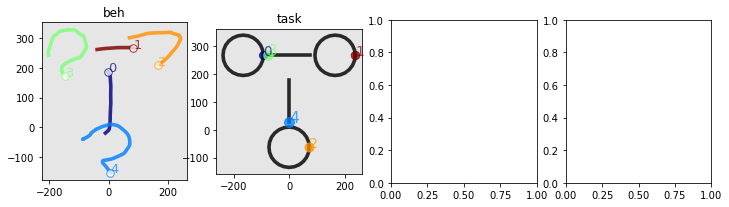

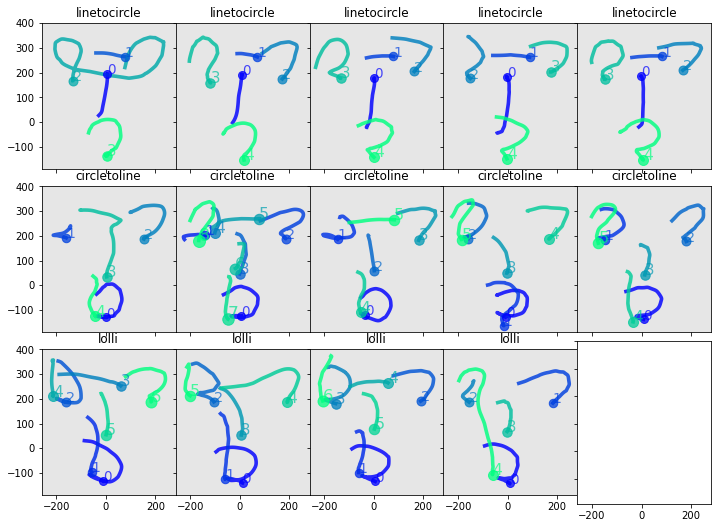

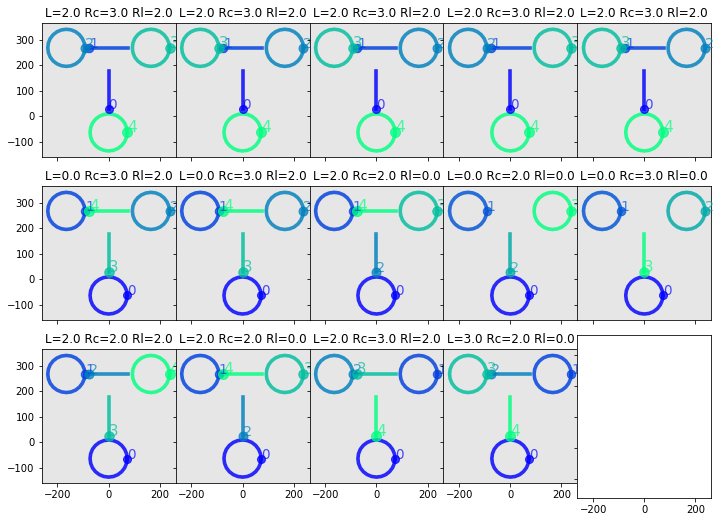

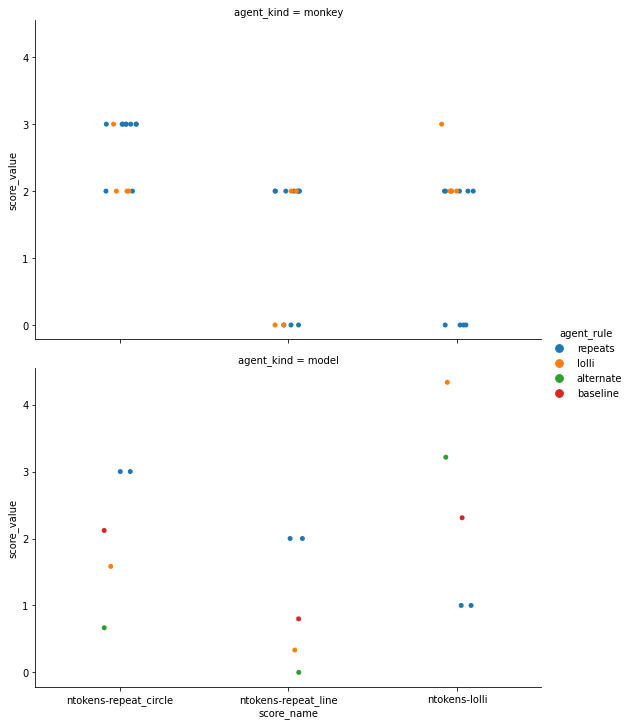

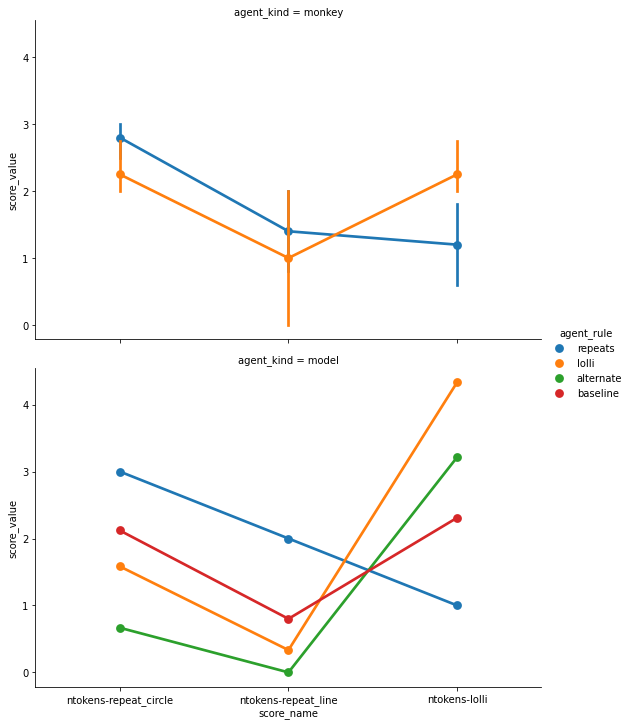

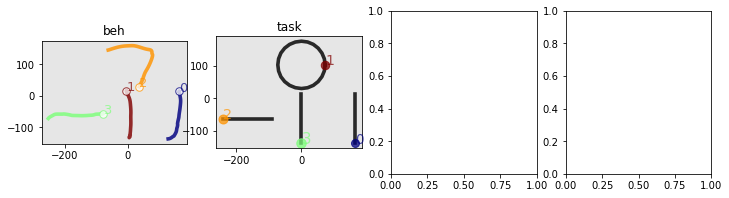

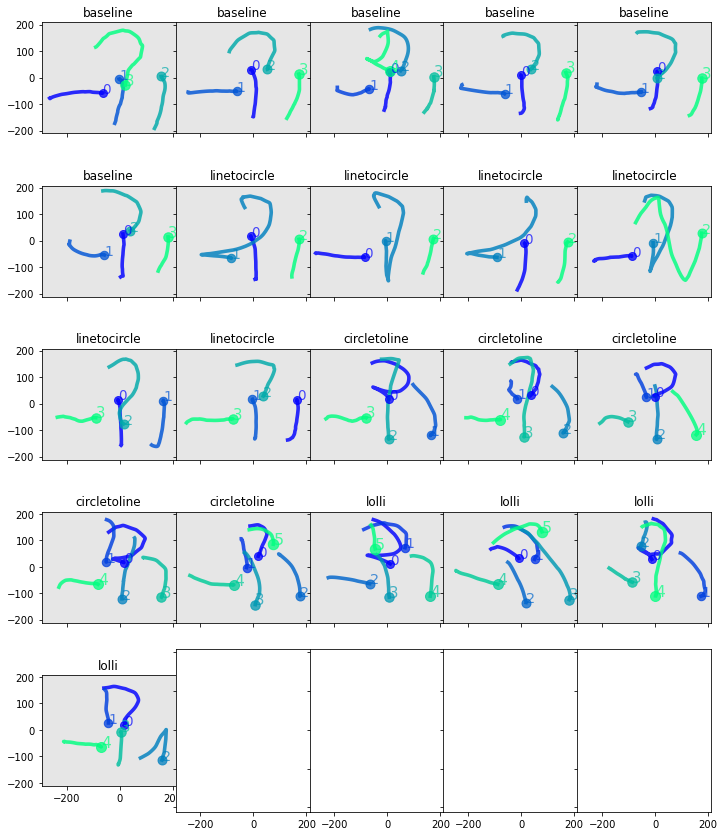

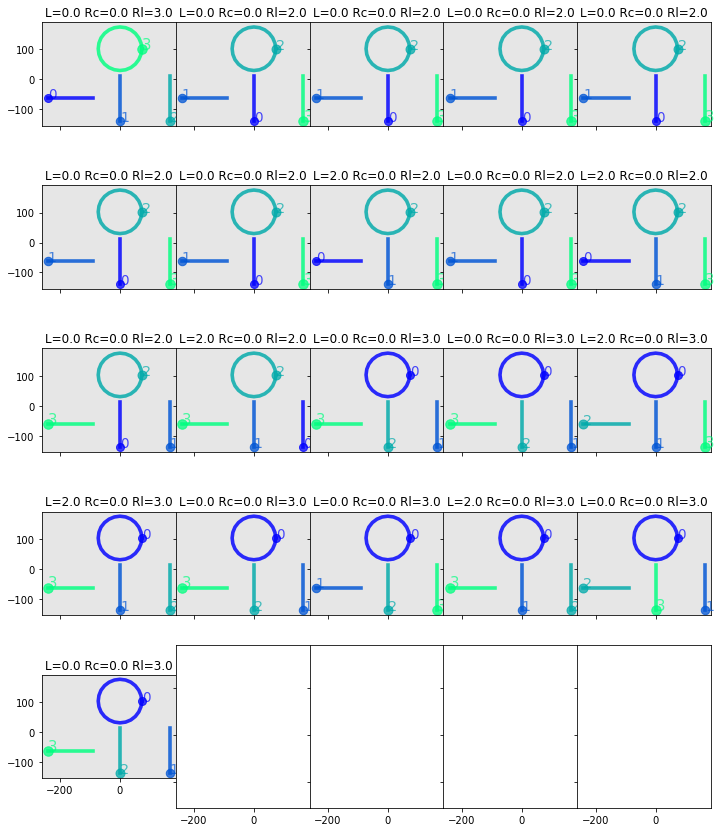

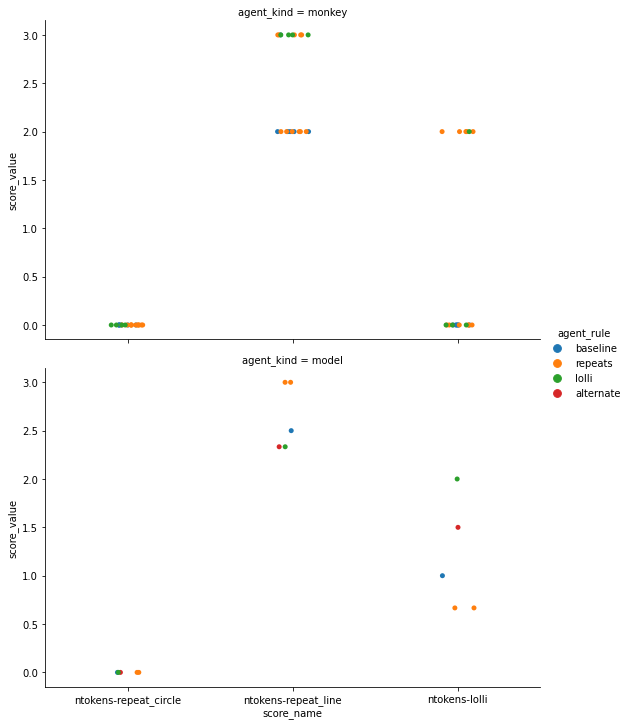

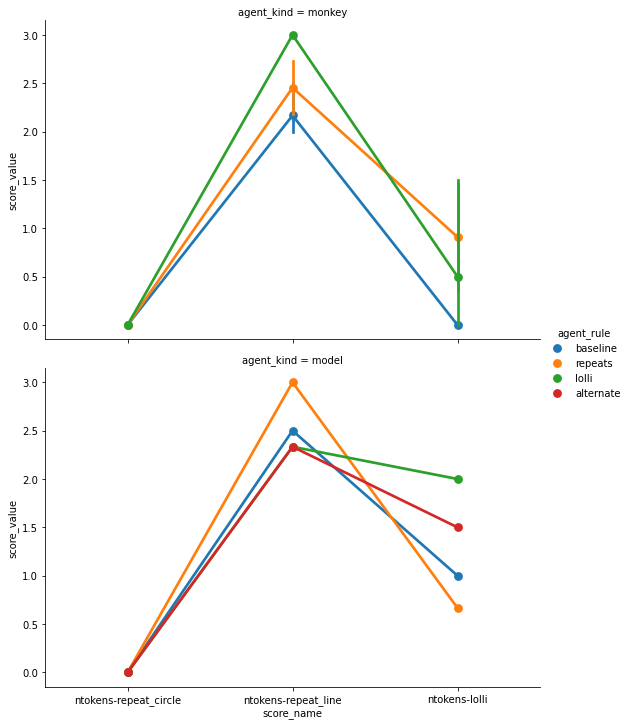

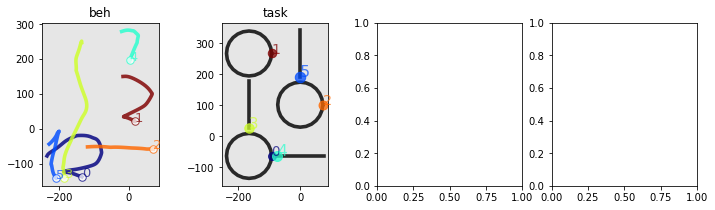

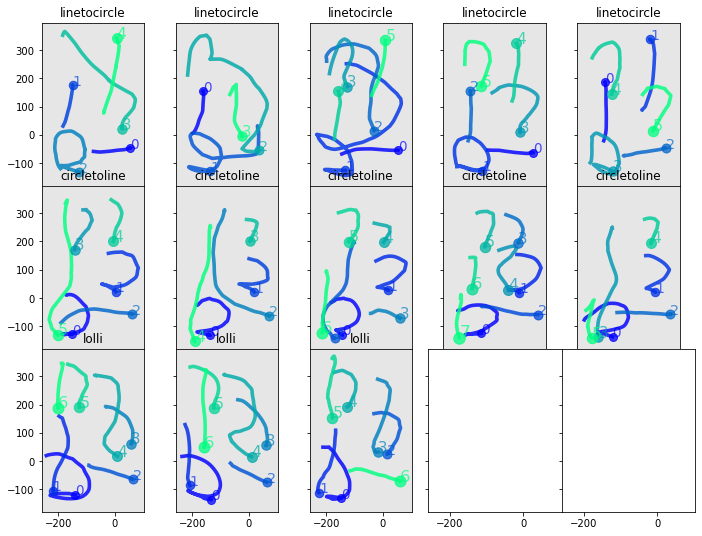

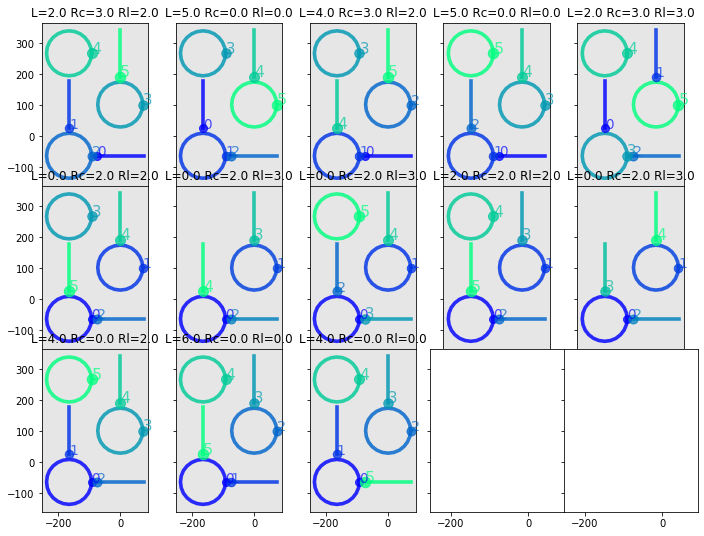

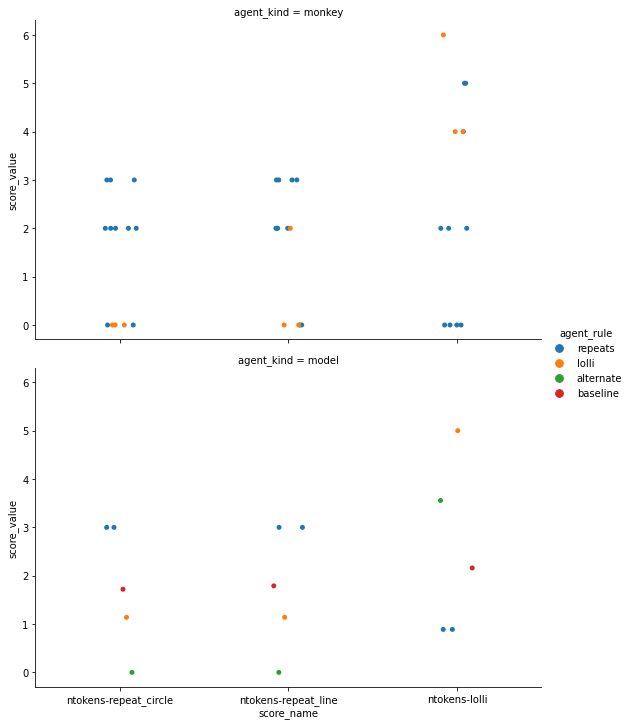

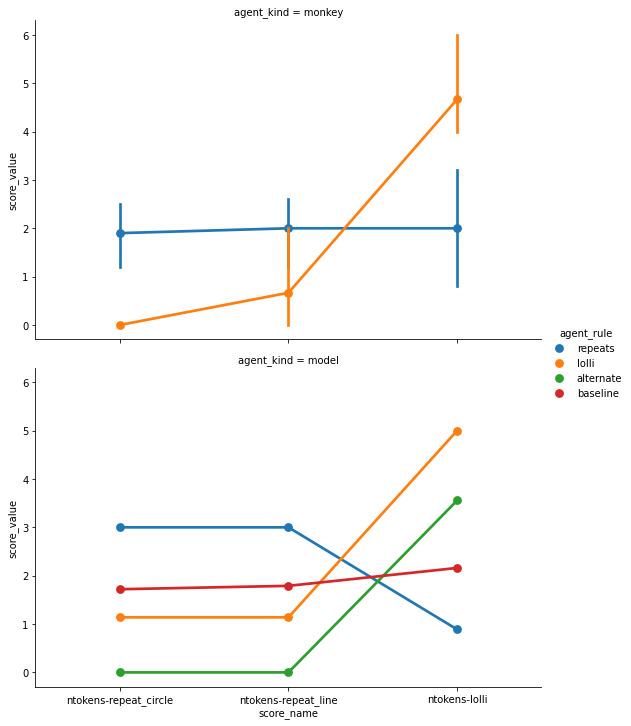

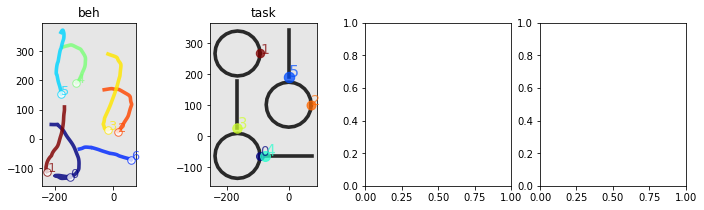

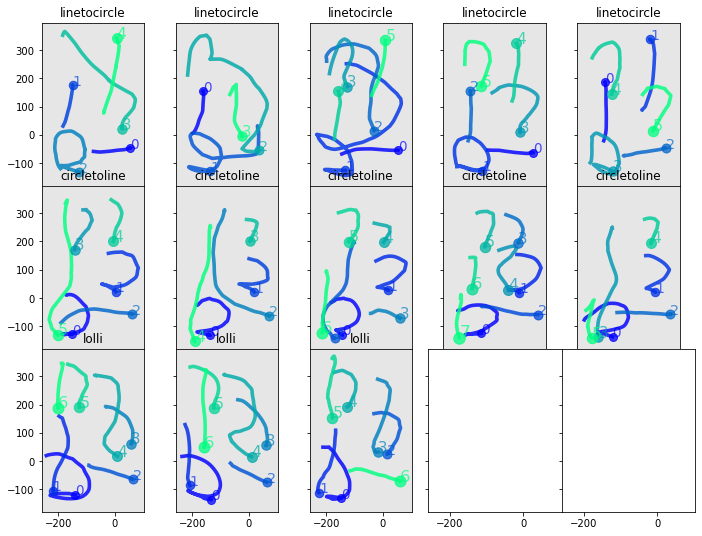

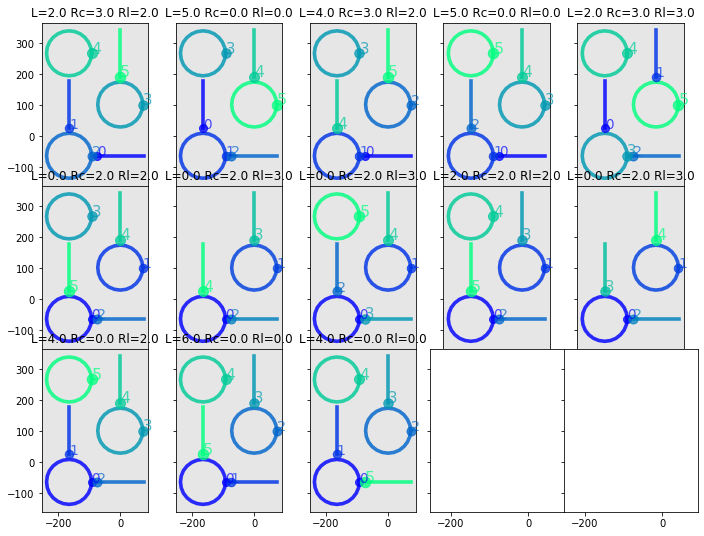

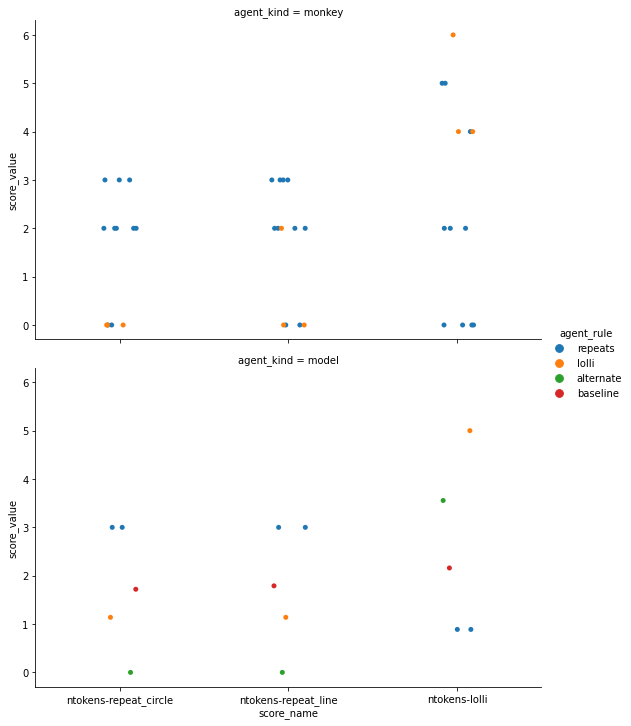

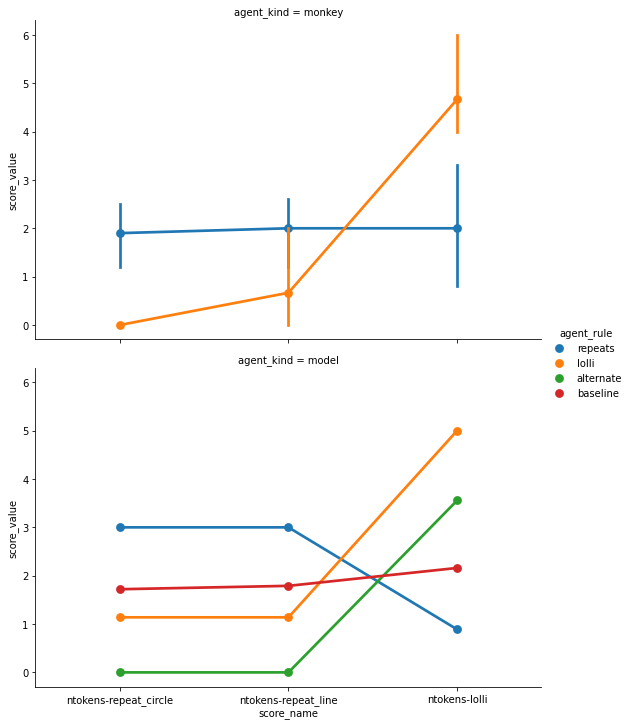

In [100]:
### Keep list of interesting trials
list_trials_examples = [333,337, 539, 656]
sdirthis = f"{sdir}/example_chars_handpicked"
os.makedirs(sdirthis, exist_ok=True)

for indtrial in list_trials_examples:
    list_figs = _plot_summary_character(indtrial=indtrial)
    for i, fig in enumerate(list_figs):
        fig.savefig(f"{sdirthis}/indtrial_{indtrial}_{i}.pdf")
    
    

##### plot all trials for a single task

(<Figure size 864x216 with 4 Axes>,
 <Figure size 864x1080 with 25 Axes>,
 <Figure size 864x1080 with 25 Axes>,
 <seaborn.axisgrid.FacetGrid at 0x7f3bb2d36650>)

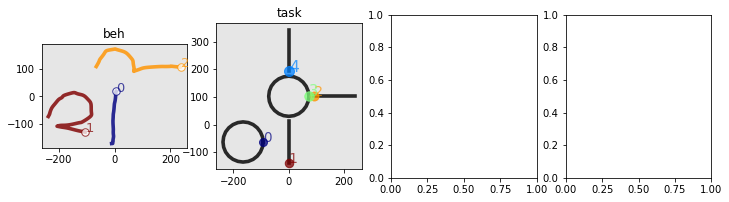

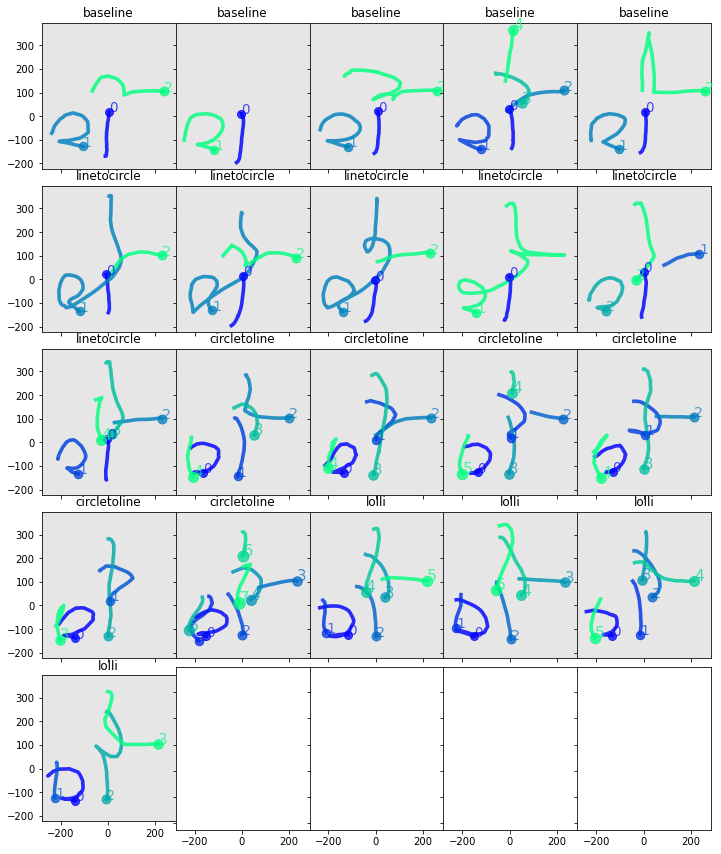

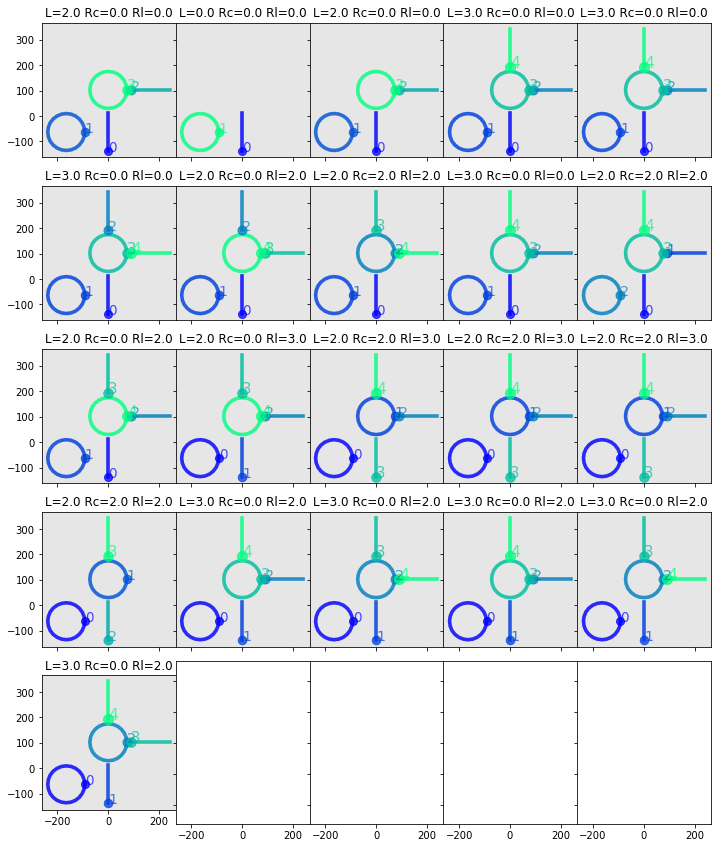

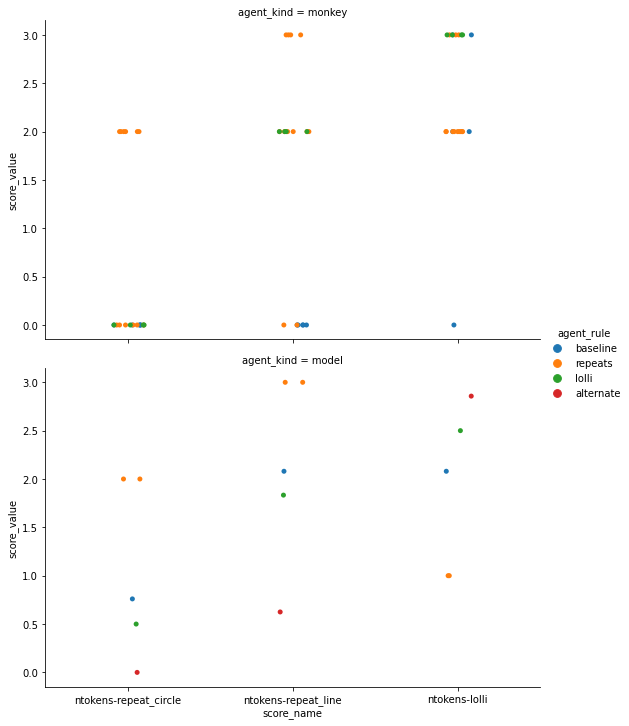

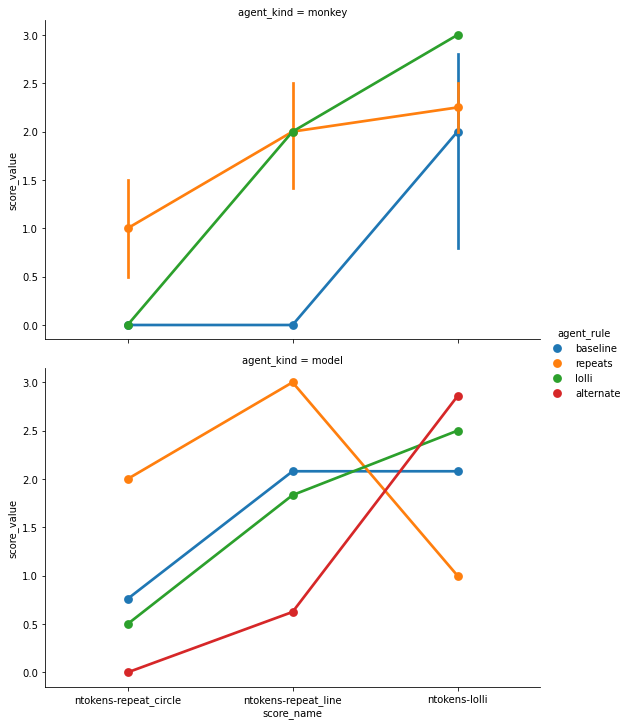

In [99]:
# Picks out the character for this trial, then plots all tirals.
_plot_summary_character(indtrial= indtrial)

##### After plotting examples, then prune dataset for summary plots

In [101]:
### Process data
# - remove monkey baseline. this becuase monkey baseline should nto be confused with model baseline (random).
dfall = dfall[dfall["agent"]!="Pancho-baseline"].reset_index()

In [102]:

# Aggregate, taking mean over trials
dfall_agg = aggregGeneral(dfall, group=["score_name", "character", "agent_kind", "agent_rule"], 
              values=["score_value"], nonnumercols=[])



{'score_value': ['mean']}


##### Plot grand summary

In [34]:
sdir = f"{SDIR}/FIGS"
import os
os.makedirs(sdir, exist_ok=True)

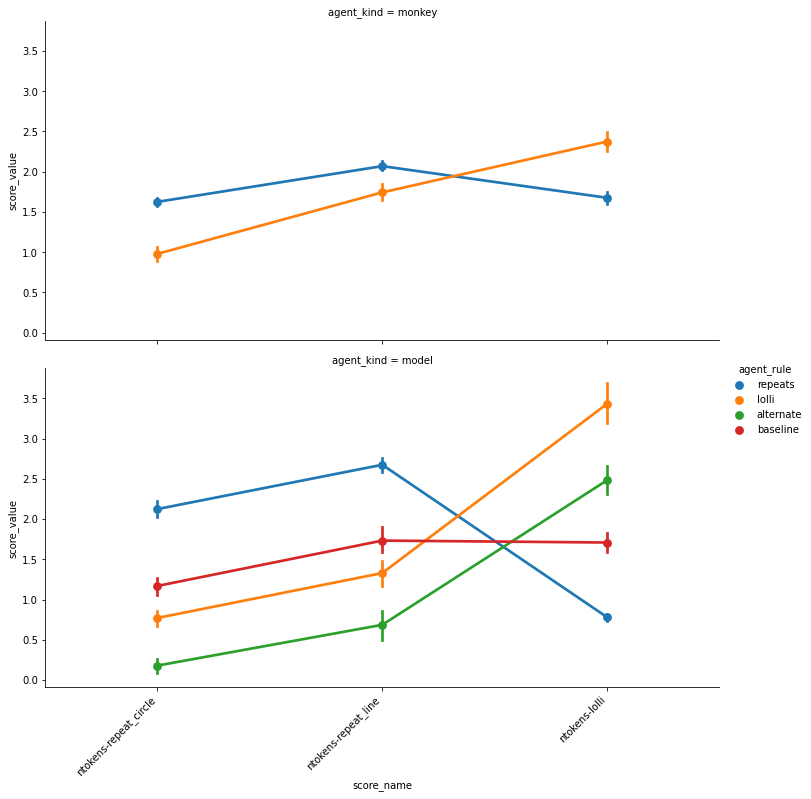

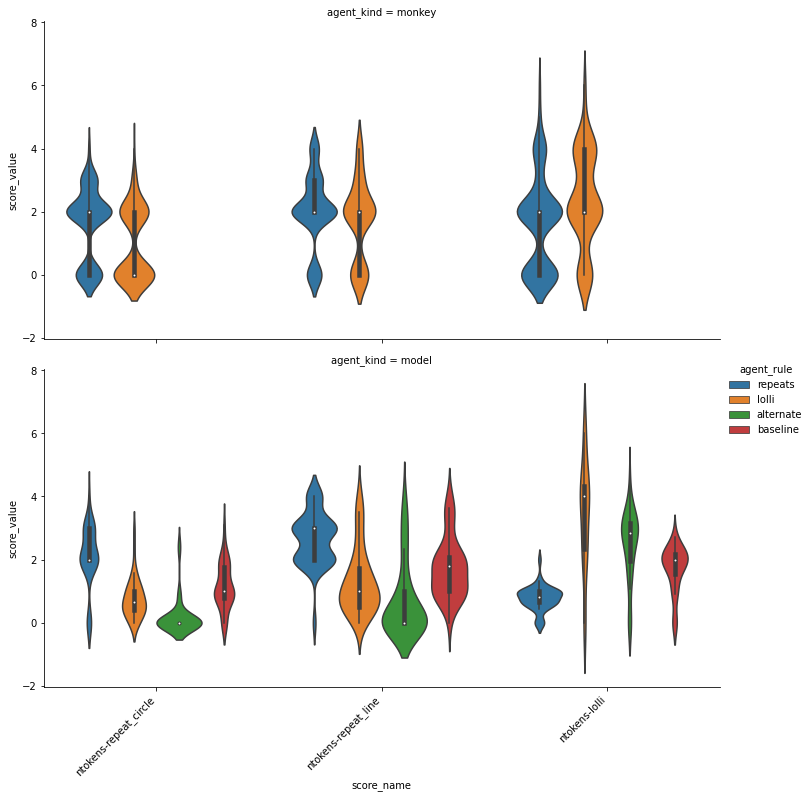

In [28]:
### MEAN ACROSS TRIALS

g = sns.catplot(data=dfall, x="score_name", y="score_value", row="agent_kind", hue="agent_rule",
                kind="point", ci=68, aspect=2)
from pythonlib.tools.snstools import rotateLabel
rotateLabel(g)

g = sns.catplot(data=dfall, x="score_name", y="score_value", row="agent_kind", hue="agent_rule",
                kind="violin", aspect=2)
from pythonlib.tools.snstools import rotateLabel
rotateLabel(g)



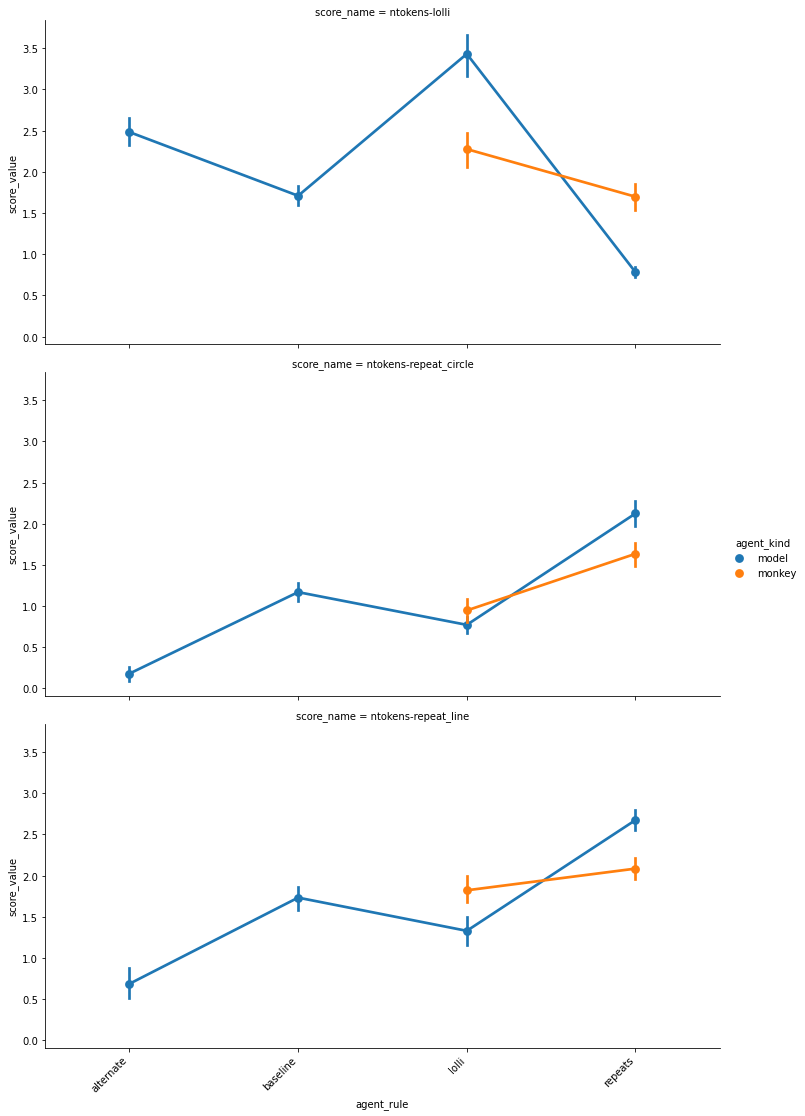

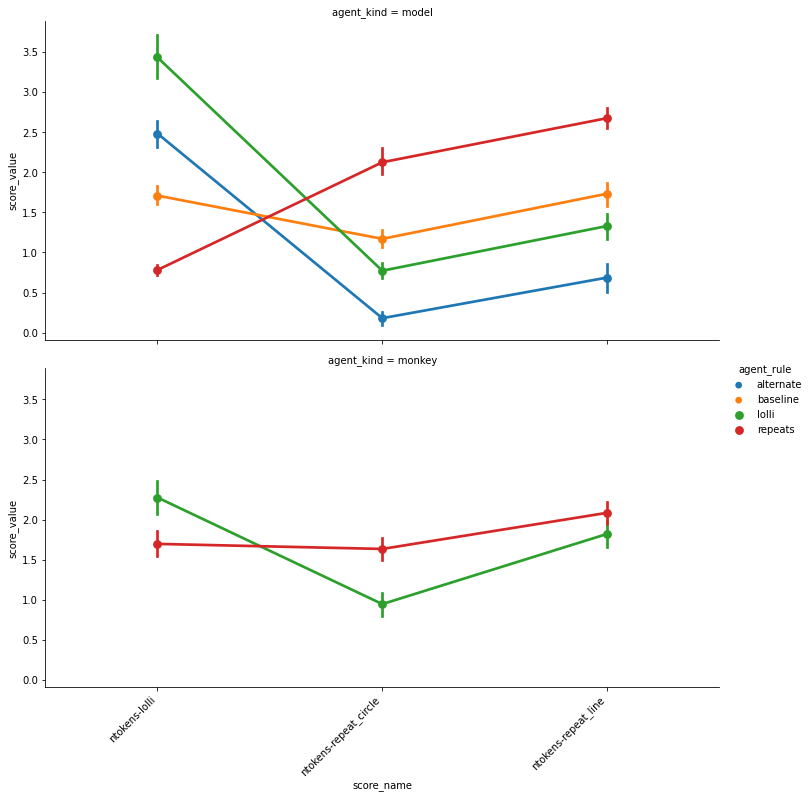

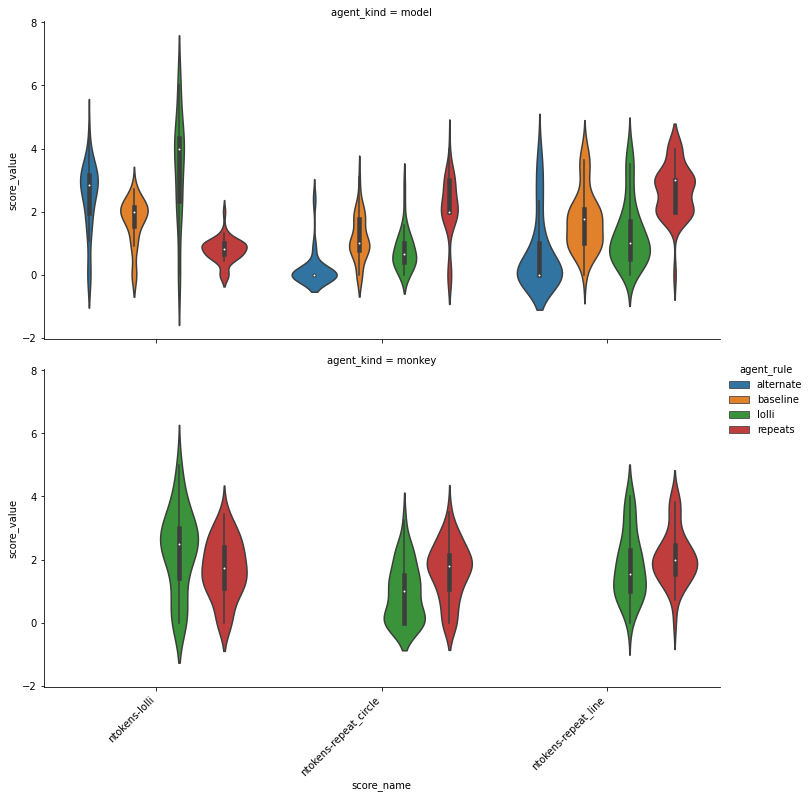

In [35]:
# MEAN ACROSS TASKS

g = sns.catplot(data=dfall_agg, x="agent_rule", y="score_value", row="score_name", hue="agent_kind",
                kind="point", ci=68, aspect=2)
from pythonlib.tools.snstools import rotateLabel
rotateLabel(g)
g.savefig(f"{sdir}/mean_across_tasks_1.pdf")

g = sns.catplot(data=dfall_agg, x="score_name", y="score_value", row="agent_kind", hue="agent_rule",
                kind="point", ci=68, aspect=2)
from pythonlib.tools.snstools import rotateLabel
rotateLabel(g)
g.savefig(f"{sdir}/mean_across_tasks_2.pdf")

g = sns.catplot(data=dfall_agg, x="score_name", y="score_value", row="agent_kind", hue="agent_rule", 
                kind="violin", aspect=2)
from pythonlib.tools.snstools import rotateLabel
rotateLabel(g)
g.savefig(f"{sdir}/mean_across_tasks_3.pdf")


##### Regression beh vs. model prediction

1. num lollis

2. num repeats

3. some single scalar that combines those?

##### Method for deriving scores (e.g., subtract baseline model, or subtract two models)

In [103]:
def _convert_to_baseline_subtracted(dfall_agg):
    # Subtract expected score (given random) from each non-random-model score
    dfthis = dfall_agg[(dfall_agg["agent_kind"]=="model") & (dfall_agg["agent_rule"]=="baseline")]
    dfthis = dfthis[["character", "score_name", "score_value"]]

    dfall_agg_basesubtr = pd.merge(dfall_agg, dfthis, on=["character", "score_name"], how="inner", validate="many_to_one")

    def F(x):
        return x["score_value_x"] - x["score_value_y"]
    dfall_agg_basesubtr = applyFunctionToAllRows(dfall_agg_basesubtr, F, "score_value")
    
    del dfall_agg_basesubtr["score_value_x"]
    del dfall_agg_basesubtr["score_value_y"]
    return dfall_agg_basesubtr



##### Convert to wide form to plot relationships between models/monkey

In [105]:
from pythonlib.tools.pandastools import pivot_table

def _convert_to_pivot(dfagg_this, values=["score_value"]):
    dfall_agg_pivot = pivot_table(dfagg_this, index = ["character"], 
                                  columns=["score_name", "agent_kind", "agent_rule"], values=values)
    return dfall_agg_pivot

In [136]:
# Good plot, scatters of score, monkey vs,. model

def _plot_scatter_all(DFALL_AGG, SCORE_NAME, SCORE_NAME_MONKEY, OVERLAY_MODELS_HACK):
#     SCORE_NAME = "score_value-lolli_min_alternate"
#     SCORE_NAME = "score_value"
#     SCORE_NAME_MONKEY = "score_value"
#     DFALL_AGG = dfall_agg_this
#     OVERLAY_MODELS_HACK = True

    list_rules = DFALL_AGG["agent_rule"].unique().tolist()
    list_scores = DFALL_AGG["score_name"].unique().tolist()
    nrules = len(list_rules)
    nscores = len(list_scores)
    fig, axes = plt.subplots(nrules, nscores, sharex=False, sharey=False, figsize=(nscores*5, nrules*6))
    # fig, axes = plt.subplots(nrules, nscores, sharex=True, sharey=True, figsize=(nscores*5, nrules*6))

    values = [SCORE_NAME, SCORE_NAME_MONKEY]
    dfall_agg_pivot = _convert_to_pivot(DFALL_AGG, values=values)

    for i, rule in enumerate(list_rules):
        if rule=="baseline":
            # since it will be overlaid on the other plot anyway
            continue

        for j, score in enumerate(list_scores):
            ax = axes[i][j]

            x = dfall_agg_pivot[SCORE_NAME][score]["model"][rule]
            ax.set_xlabel(f"model-{rule}")
            ax.plot(x,x, 'xk', label="model")
            
            # add some jitter to x
            nthis = len(x)
            SCALE = 0.1
            x = x.copy() + SCALE*np.random.rand(nthis)
            # always overlay what a random model would do
            y = dfall_agg_pivot[SCORE_NAME][score]["model"]["baseline"]
            ax.plot(x,y, 'xr', label="model")

            # overlay other models
            if OVERLAY_MODELS_HACK:
                y = dfall_agg_pivot["score_value"][score]["model"]["lolli"]
                ax.plot(x,y, '.g', label="lolli")
                y = dfall_agg_pivot["score_value"][score]["model"]["alternate"]
                ax.plot(x,y, '.b', label="alternate")

            for rule_this in list_rules:
                if rule_this == "baseline":
                    # beh baseline is not really baseline..
                    continue
                try:
                    y = dfall_agg_pivot[SCORE_NAME_MONKEY][score]["monkey"][rule_this]
                    ax.plot(x,y, 'o', label=rule_this, alpha=0.8)
        #             ax.set_ylabel(rule)
                    ax.set_title(score)
                except:
                    pass
            ax.legend()
    return fig


In [115]:
sdirthis = f"{sdir}/scatters"
os.makedirs(sdirthis, exist_ok=True)

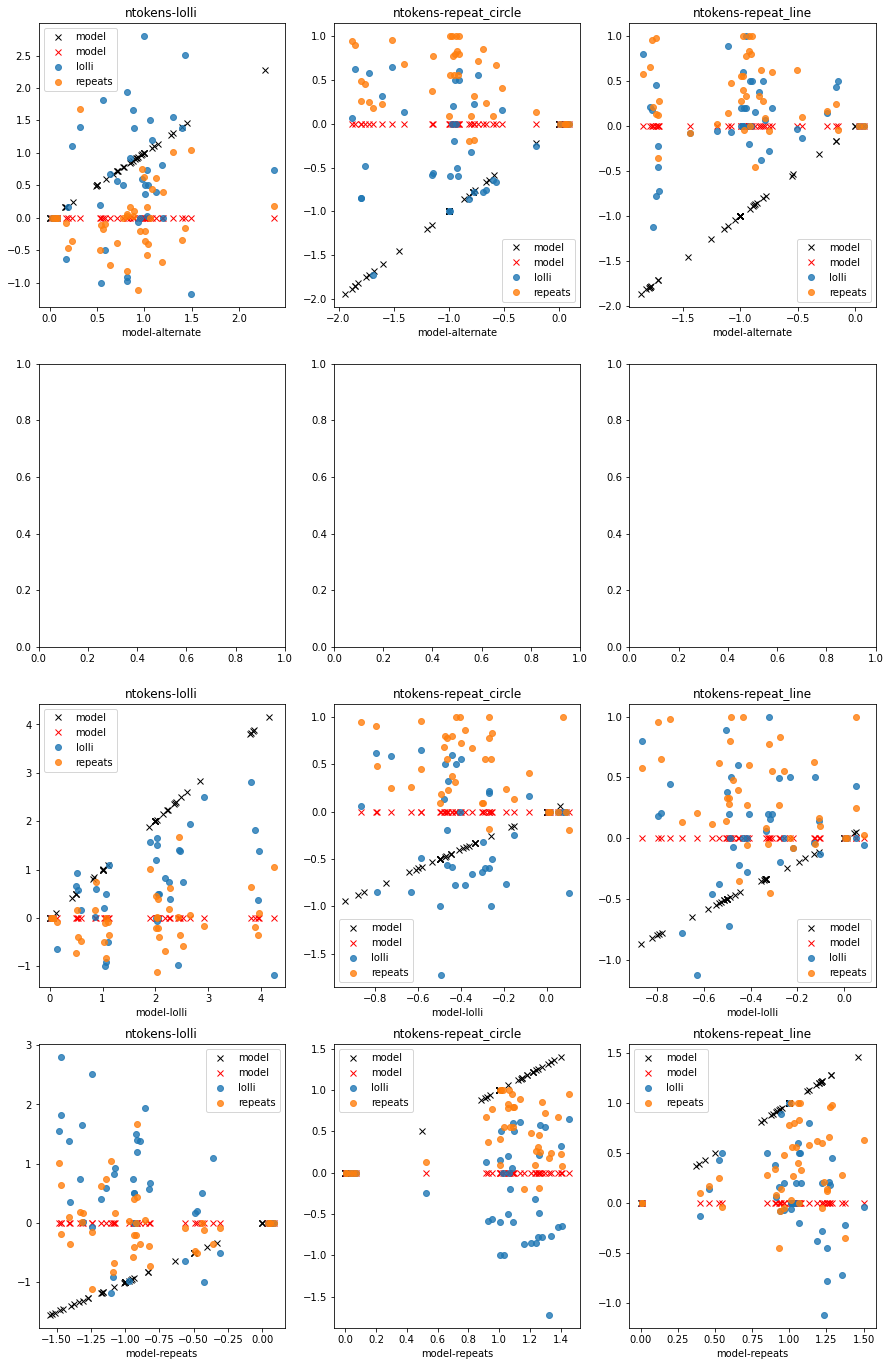

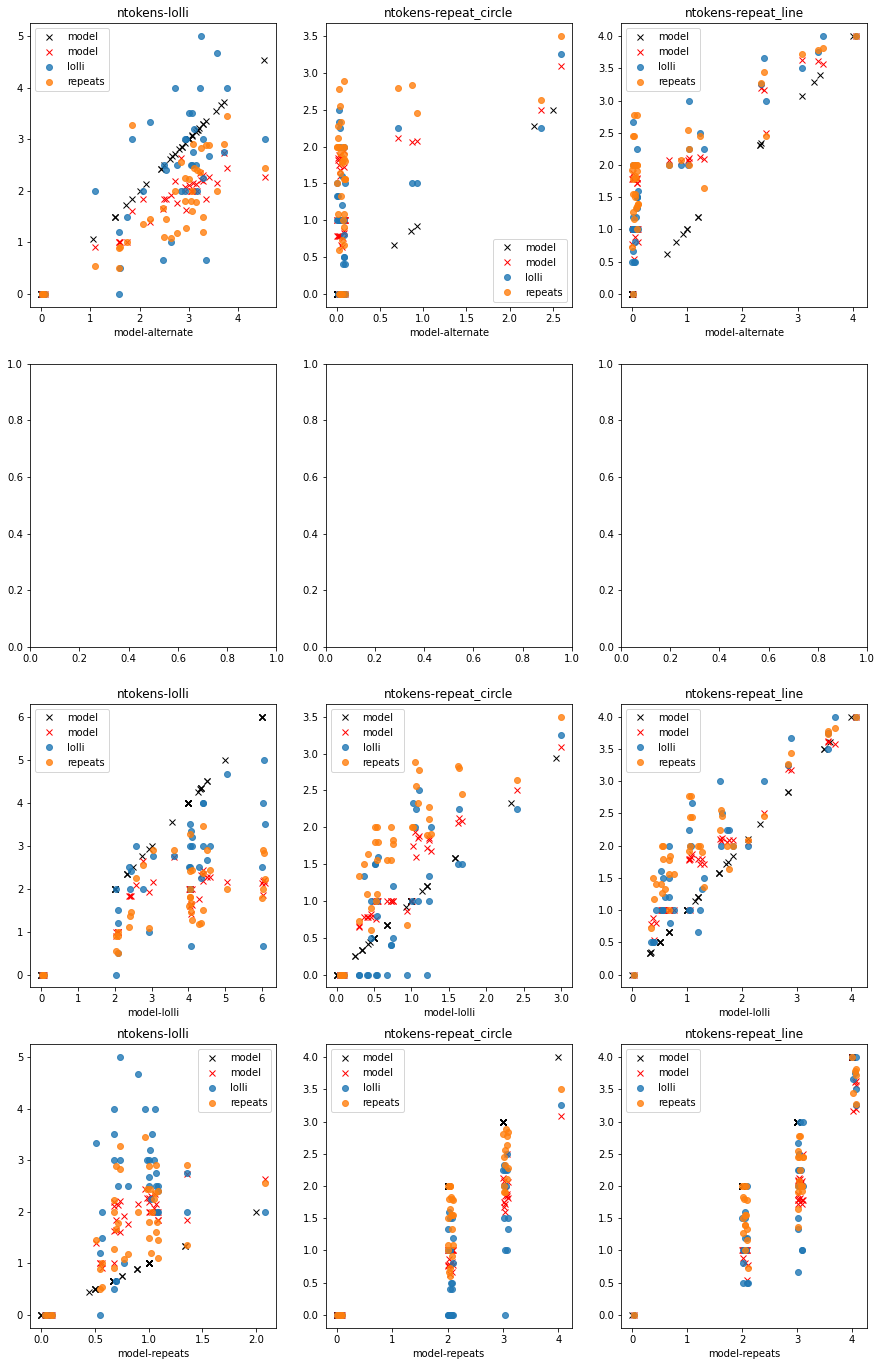

In [137]:
# dfall_agg_pivot["score_value-lolli_min_alternate"]["ntokens-lolli"]

# Plot all scored with or without normalizing (which subtracts baseline(random) model from each model and beh score).
# tasks sorted along x axis, based on expected score for the x axis model. black cross is positive control.
# red cross is random model. In dots are behavior under different priors.

for DO_BASE_SUBTR in [True, False]:
    if DO_BASE_SUBTR:
        dfall_agg_this = _convert_to_baseline_subtracted(dfall_agg)
        suff = "withbasesubtr"
    else:
        dfall_agg_this = dfall_agg
        suff = "notbasesubtr"

    SCORE_NAME = "score_value"
    SCORE_NAME_MONKEY = "score_value"
    DFALL_AGG = dfall_agg_this
    OVERLAY_MODELS_HACK = False
    fig = _plot_scatter_all(DFALL_AGG, SCORE_NAME, SCORE_NAME_MONKEY, OVERLAY_MODELS_HACK)
    fig.savefig(f"{sdirthis}/{SCORE_NAME}-{OVERLAY_MODELS_HACK}-{suff}.pdf")

### Collect r2 and slope

Regressing beh vs. model.

In [139]:
from scipy.stats import linregress

BASE_SUBTRACTED = True

if BASE_SUBTRACTED:
    DFTHIS = _convert_to_baseline_subtracted(dfall_agg)
else:
    DFTHIS = dfall_agg
    
dfall_agg_pivot = pivot_table(DFTHIS, index = ["character"], 
                              columns=["score_name", "agent_kind", "agent_rule"], values=["score_value"])

list_rules = DFTHIS["agent_rule"].unique().tolist()
list_scores = DFTHIS["score_name"].unique().tolist()

if BASE_SUBTRACTED:
    list_rules_model = [r for r in list_rules if r != "baseline"] # since this all 0
else:
    list_rules_model = list_rules
list_rules_monkey = dfall_agg[dfall_agg["agent_kind"]=="monkey"]["agent_rule"].unique().tolist()

OUT = []
# Get correlation between all pairs of variables
for score in list_scores:
    # iterate over models
    for rule_model in list_rules_model:
        x = dfall_agg_pivot["score_value"][score]["model"][rule_model]
        
        # iterate oiver monkey
        for rule_monkey in list_rules_monkey:
            
            # monkey might not hvae all the rules (some are just for model)
            y = dfall_agg_pivot["score_value"][score]["monkey"][rule_monkey]
            
            # remove nans from beh (task shouldnt have nan)
            inds = np.where(~np.isnan(y))[0]
            
            x = x[inds]
            y = y[inds]
            res = linregress(x,y)
            
            OUT.append({
                "rule_model":rule_model,
                "rule_monkey":rule_monkey,
                "score_name":score,
                "linreg_res":res,
                "linreg_slope":res.slope,
                "linreg_r":res.rvalue,     
                "linreg_r2":res.rvalue**2
            })
            
            if np.isnan(res.slope):
                
                print(x)
                print(y)
                print(inds)
                print(OUT[-1])
                assert False

In [140]:
df_regress = pd.DataFrame(OUT)
df_regress[:5]

,rule_model,rule_monkey,score_name,linreg_res,linreg_slope,linreg_r,linreg_r2
0,alternate,lolli,ntokens-lolli,"(0.49137836054461503, 0.18670412847637863, 0.2...",0.491378,0.246649,0.060836
1,alternate,repeats,ntokens-lolli,"(0.1625389877606416, -0.13703041544522945, 0.1...",0.162539,0.141229,0.019946
2,lolli,lolli,ntokens-lolli,"(0.3233263981566401, 0.009792728464834033, 0.4...",0.323326,0.409937,0.168048
3,lolli,repeats,ntokens-lolli,"(0.10288704212139226, -0.18854987889876706, 0....",0.102887,0.225808,0.050989
4,repeats,lolli,ntokens-lolli,"(-0.8748425217523028, -0.24471504128758037, -0...",-0.874843,-0.421236,0.177439


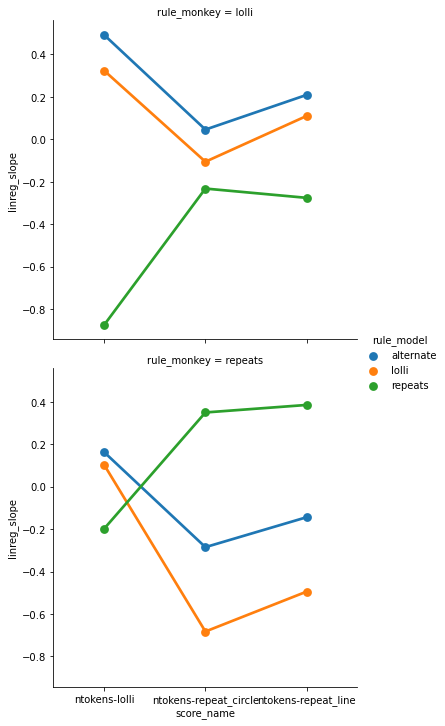

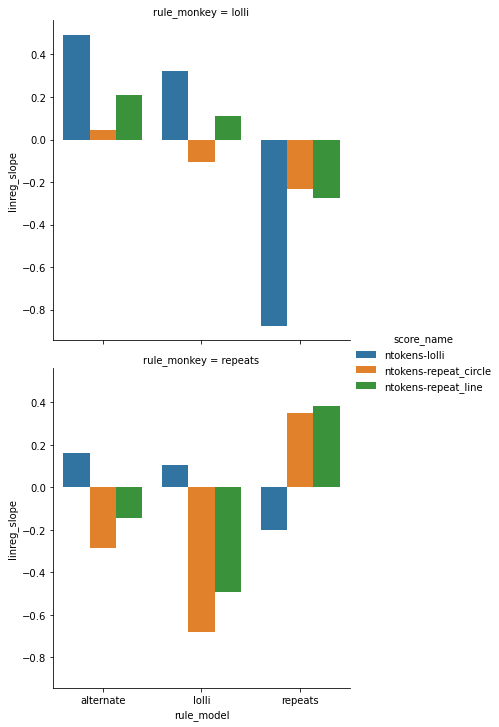

In [141]:
y = "linreg_slope"
# y = "linreg_r2"
sns.catplot(data = df_regress, x="score_name", y=y, row="rule_monkey", hue="rule_model", kind="point")

sns.catplot(data = df_regress, x="rule_model", y=y, row="rule_monkey", hue="score_name", kind="bar")

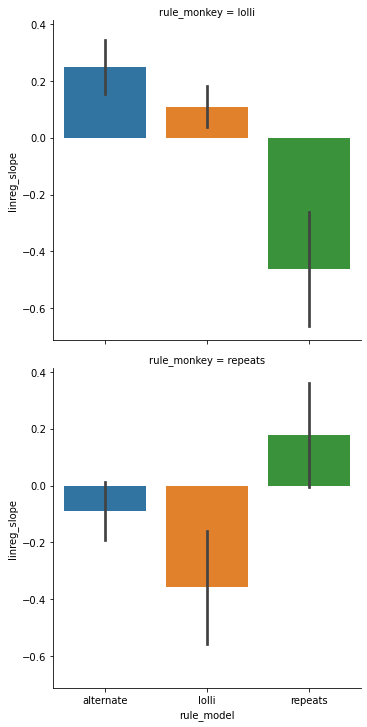

In [143]:
# Take average slope across all scoring systems
sns.catplot(data = df_regress, x="rule_model", y=y, row="rule_monkey", kind="bar", ci=68)

In [150]:
sdirthis = f"{sdir}/regression"
os.makedirs(sdirthis, exist_ok=True)

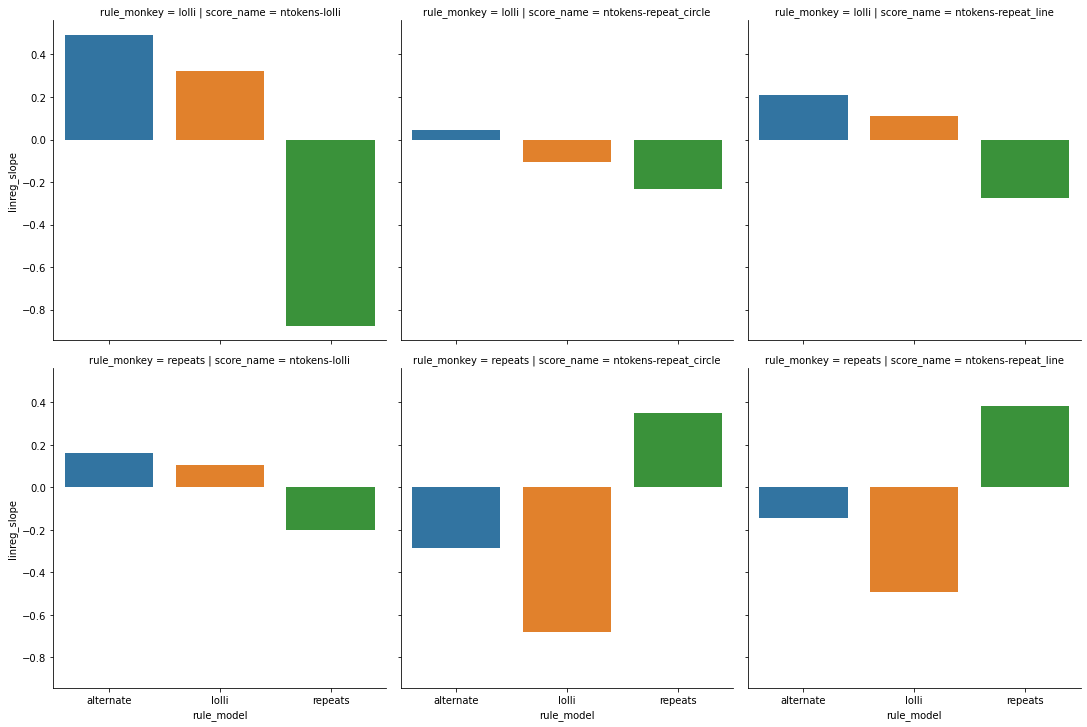

In [151]:
fig = sns.catplot(data = df_regress, x="rule_model", y=y, row="rule_monkey", col="score_name", kind="bar", ci=68)
fig.savefig(f"{sdirthis}/slopes_all_bars.pdf")

## Scatter plots, using summary score that reflects Most informative tasks for differentiating two models

x axis = an aggregate score that represents differences in predicted behavior given different models. So sorting along this axis.



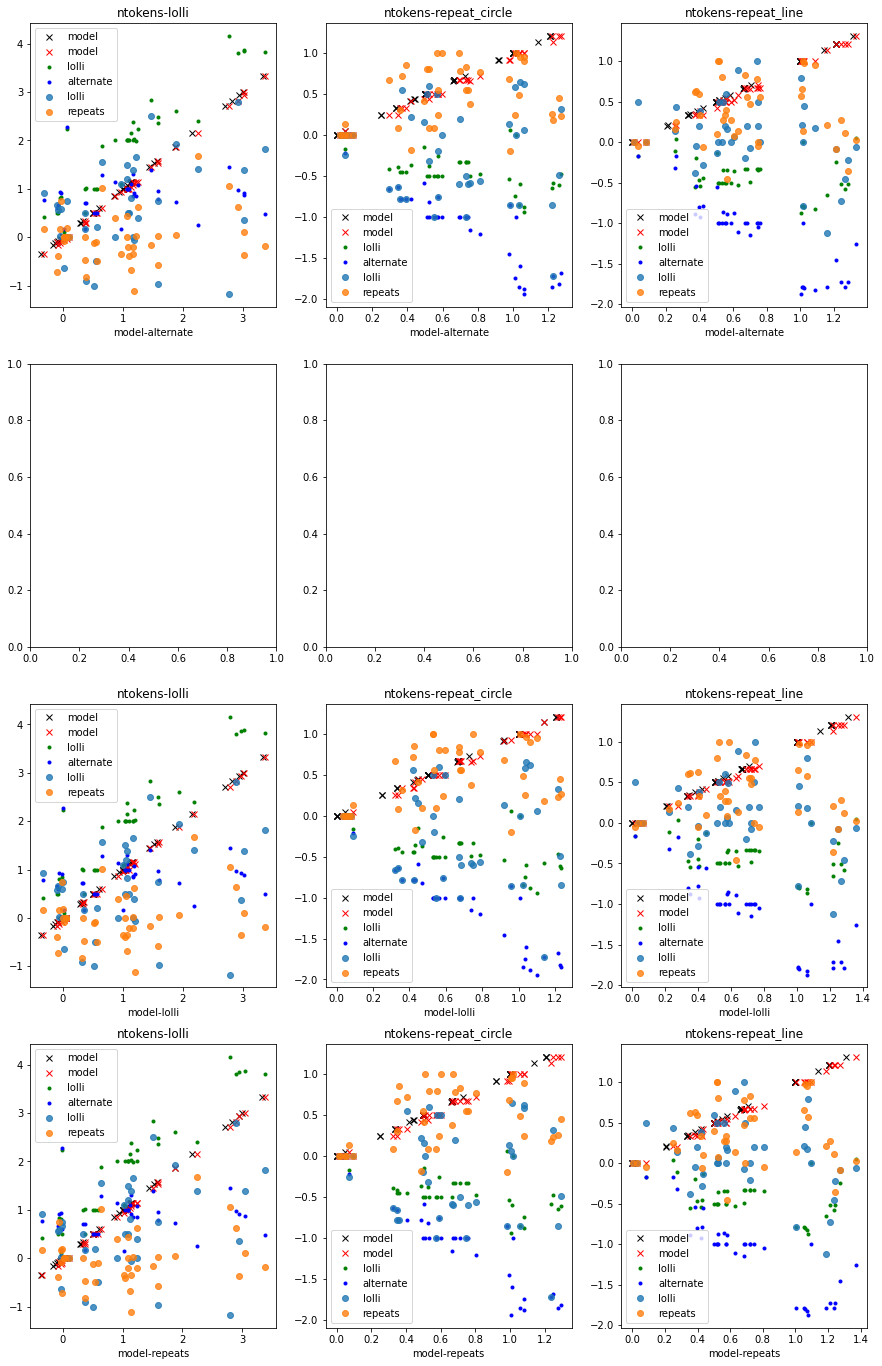

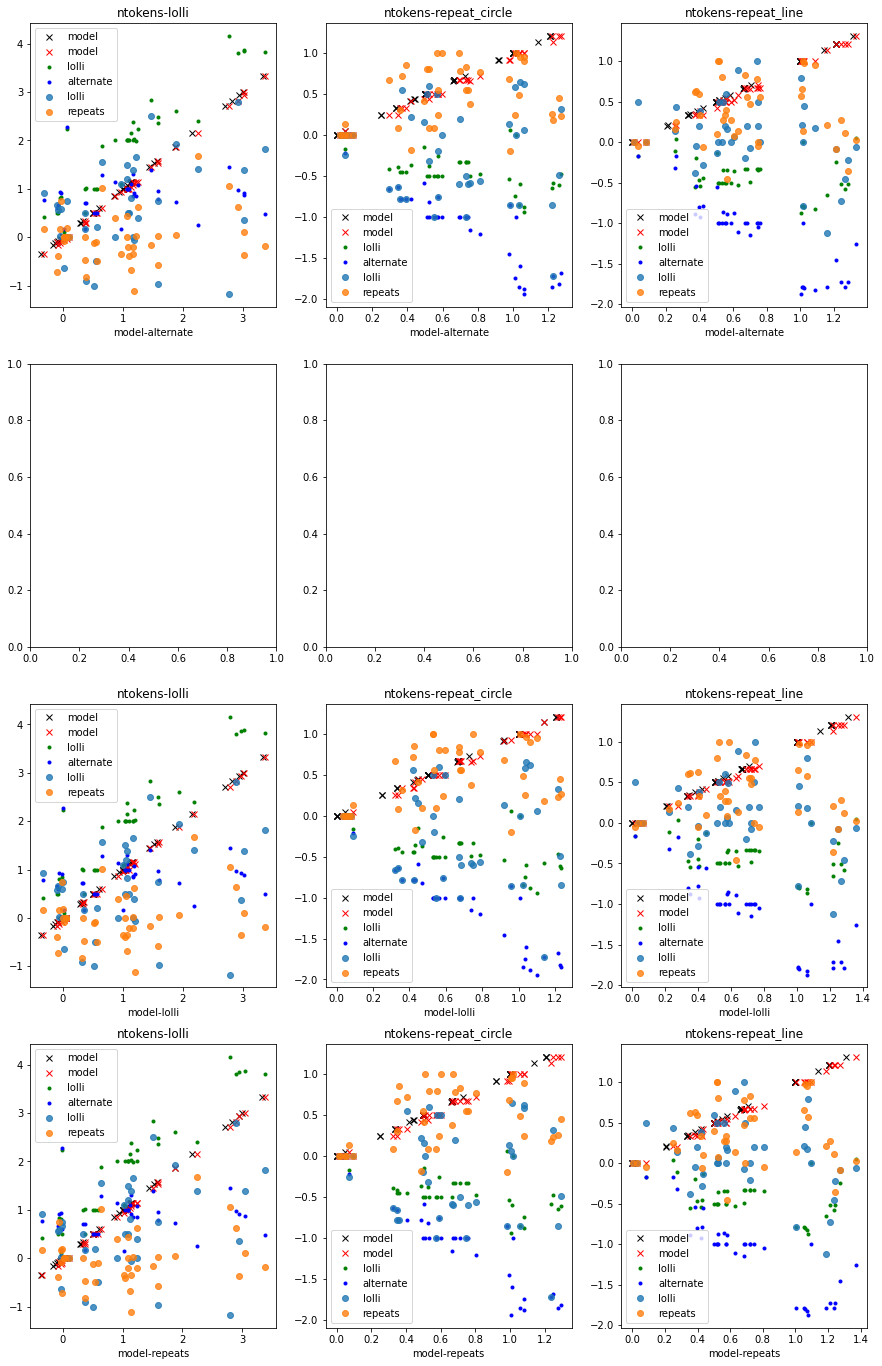

In [153]:
# dfall_agg_pivot["score_value-lolli_min_alternate"]["ntokens-lolli"]

# NOTE this plot hard to read. The x axis is fake lables. is actually the difference (lolli minus alternation models).
# More right means lolli predicts more lollis (comared to alteranation model).
# The implication is that both lolli and alterante predict similar. Behavior (blue dots) is in between them and
# doest seme to correlate more strongly with one or the other.

dfall_agg_this = _convert_to_lolli_min_alternative(_convert_to_baseline_subtracted(dfall_agg))


SCORE_NAME = "score_value-lolli_min_alternate"
# SCORE_NAME = "score_value"
SCORE_NAME_MONKEY = "score_value"
DFALL_AGG = dfall_agg_this
OVERLAY_MODELS_HACK = True
_plot_scatter_all(DFALL_AGG, SCORE_NAME, SCORE_NAME_MONKEY, OVERLAY_MODELS_HACK)

##### Plot examples, pulling out most  informative character

Note: this should be mod to use the "minus" score above. HEre wast just written first


In [155]:
# - Take difference in predict score for a pair of agents

score_kind = "score_value"
score_name = "ntokens-lolli"
agent1 = ("model", "lolli")
agent2 = ("model", "alternate")

# agent1 - agent2
A = agent1
x1 = dfall_agg_pivot[score_kind][score_name][A[0]][A[1]]
A = agent2
x2 = dfall_agg_pivot[score_kind][score_name][A[0]][A[1]]

values = (x1-x2)
inds = dfall_agg_pivot.index.tolist()


scores_sub, inds_sub = D.analy_subsample_trials_for_example(values, inds, method='top', n=5)

print(scores_sub, inds_sub)

[2.70588235 2.82352941 2.94117647 3.         3.33333333] [15, 39, 18, 1, 7]


(<Figure size 864x216 with 4 Axes>,
 <Figure size 864x648 with 15 Axes>,
 <Figure size 864x648 with 15 Axes>,
 <seaborn.axisgrid.FacetGrid at 0x7f3b9f79c350>)

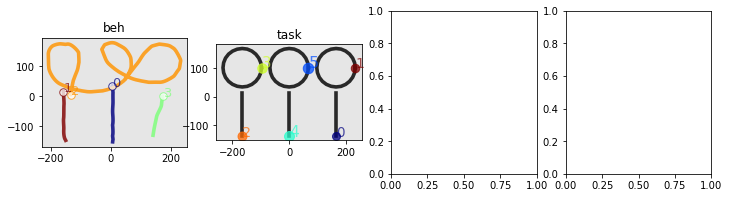

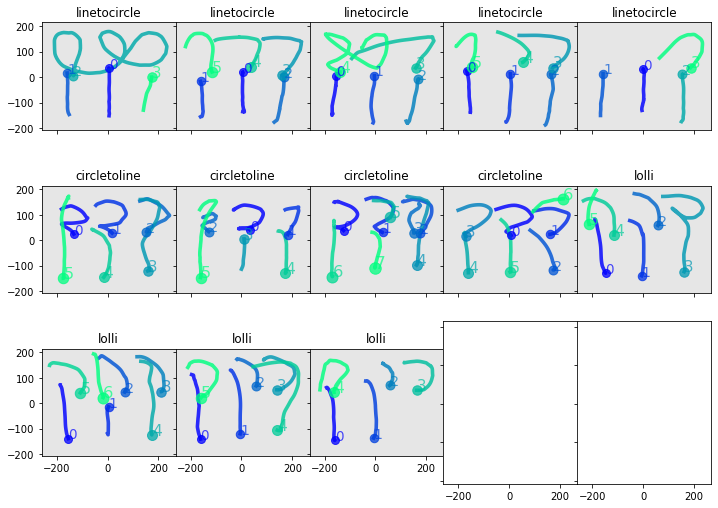

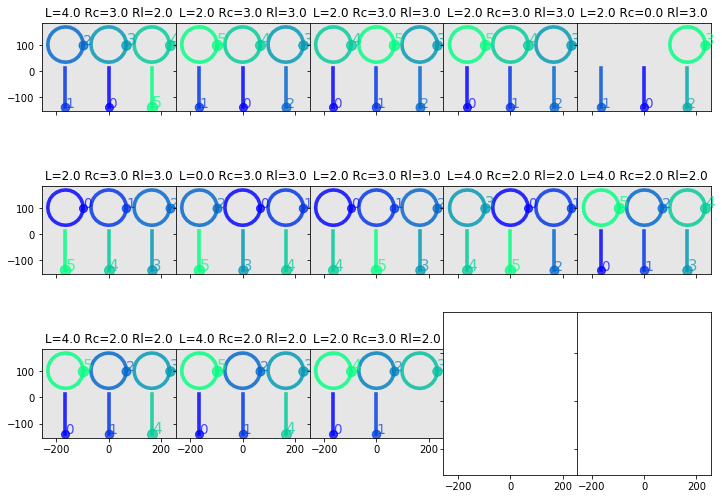

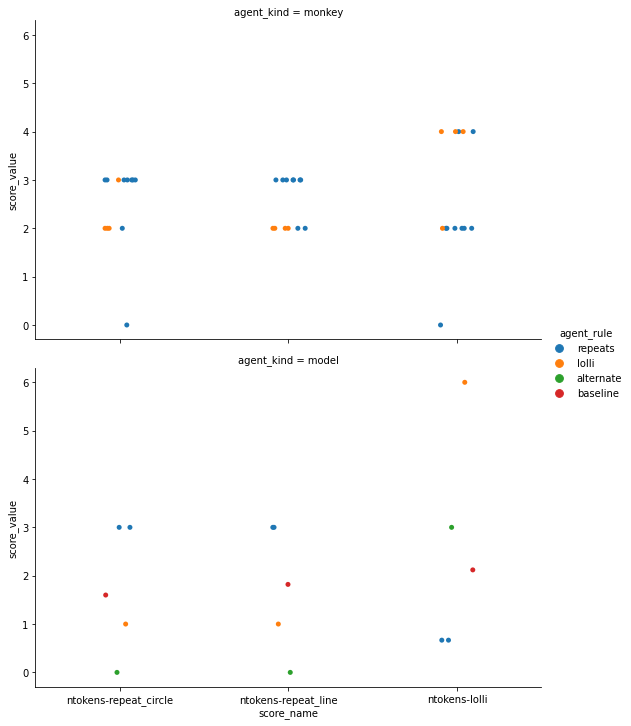

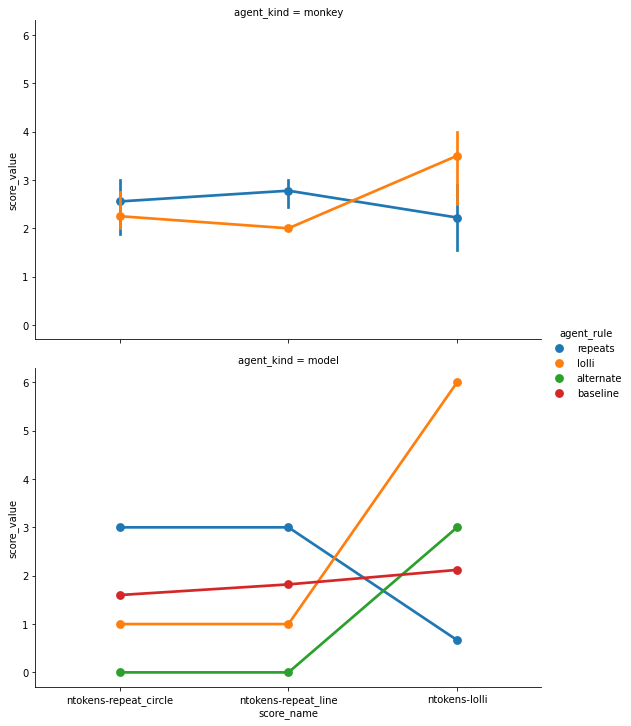

In [156]:
ind_take = -2

char = dfall_agg_pivot.iloc[inds_sub[ind_take]]["character"].tolist()[0]

# plot this char
_plot_summary_character(character=char)



#### TODO above:

clean up code.

plot by binning by xvalues.


In [ ]:
# x axis: difference between two models. y axis: beh
# this singles out the most informative tasks on the extremes

dfall_agg

In [ ]:
### TODO
# 1) Combine x and y , then bin by x then plot mean and error bars for y
# 2) Also overlay the other model? DONE - see scatter summary plot above.

# Summary statistic:
# - 

# Diagnostic task, v1 (for a specific score, like lollis)
# high for the correct model, low for random and other models.
# - pull those out. DONE, not good, since highly correlated across tasks.

# Do partial correlation analysis to get partial r2 for diff models?

# Diagnostic task v2 (difference between models)
# DO THIS:
# x = model(rep) - model(lolli)
# y = rep - lolli
# -- for diff curves: beh, random

## MORE
# 1) Plot examples for specific trials

# Only keep first N trials?


In [ ]:
# Bin by x, aggregate y. wroks even if x is not categorical.
def bin_xy_by_x(x,y, bin_centers = None):
    """ 
    """
    assert len(x)==len(y)
    
    if bin_centers:
        
    

## TODO

In [ ]:
#### Better, look for entire motif: 
# LL...CC...
# CC...LL...
# LCLCLC

# separate by interpolation vs. extrapolation
# --- which kind of lolli